## Problem Statement

* 10 Different Classes of Images from CIFAR Dataset
* 60,000 32X32 Color images
* 6000 Images of each class
* Images have low resolution of 32X32

0.airplane										
1.automobile										
2.bird										
3.cat										
4.deer										
5.dog										
6.frog										
7.horse										
8.ship										
9.truck

## Import Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Import Dataset

In [123]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()


## Shape of Data

In [124]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (10000, 1)


## Visualize the Data

[9]


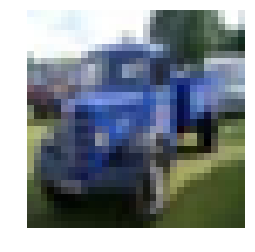

[1]


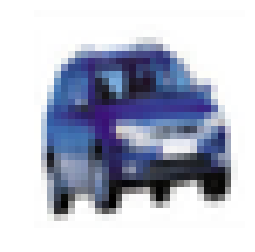

In [125]:
for i in range(2):
    random=np.random.randint(1000)
    print(y_train[random])
    plt.imshow(X_train[random])
    plt.axis("off")
    plt.show()

## Grid Plots

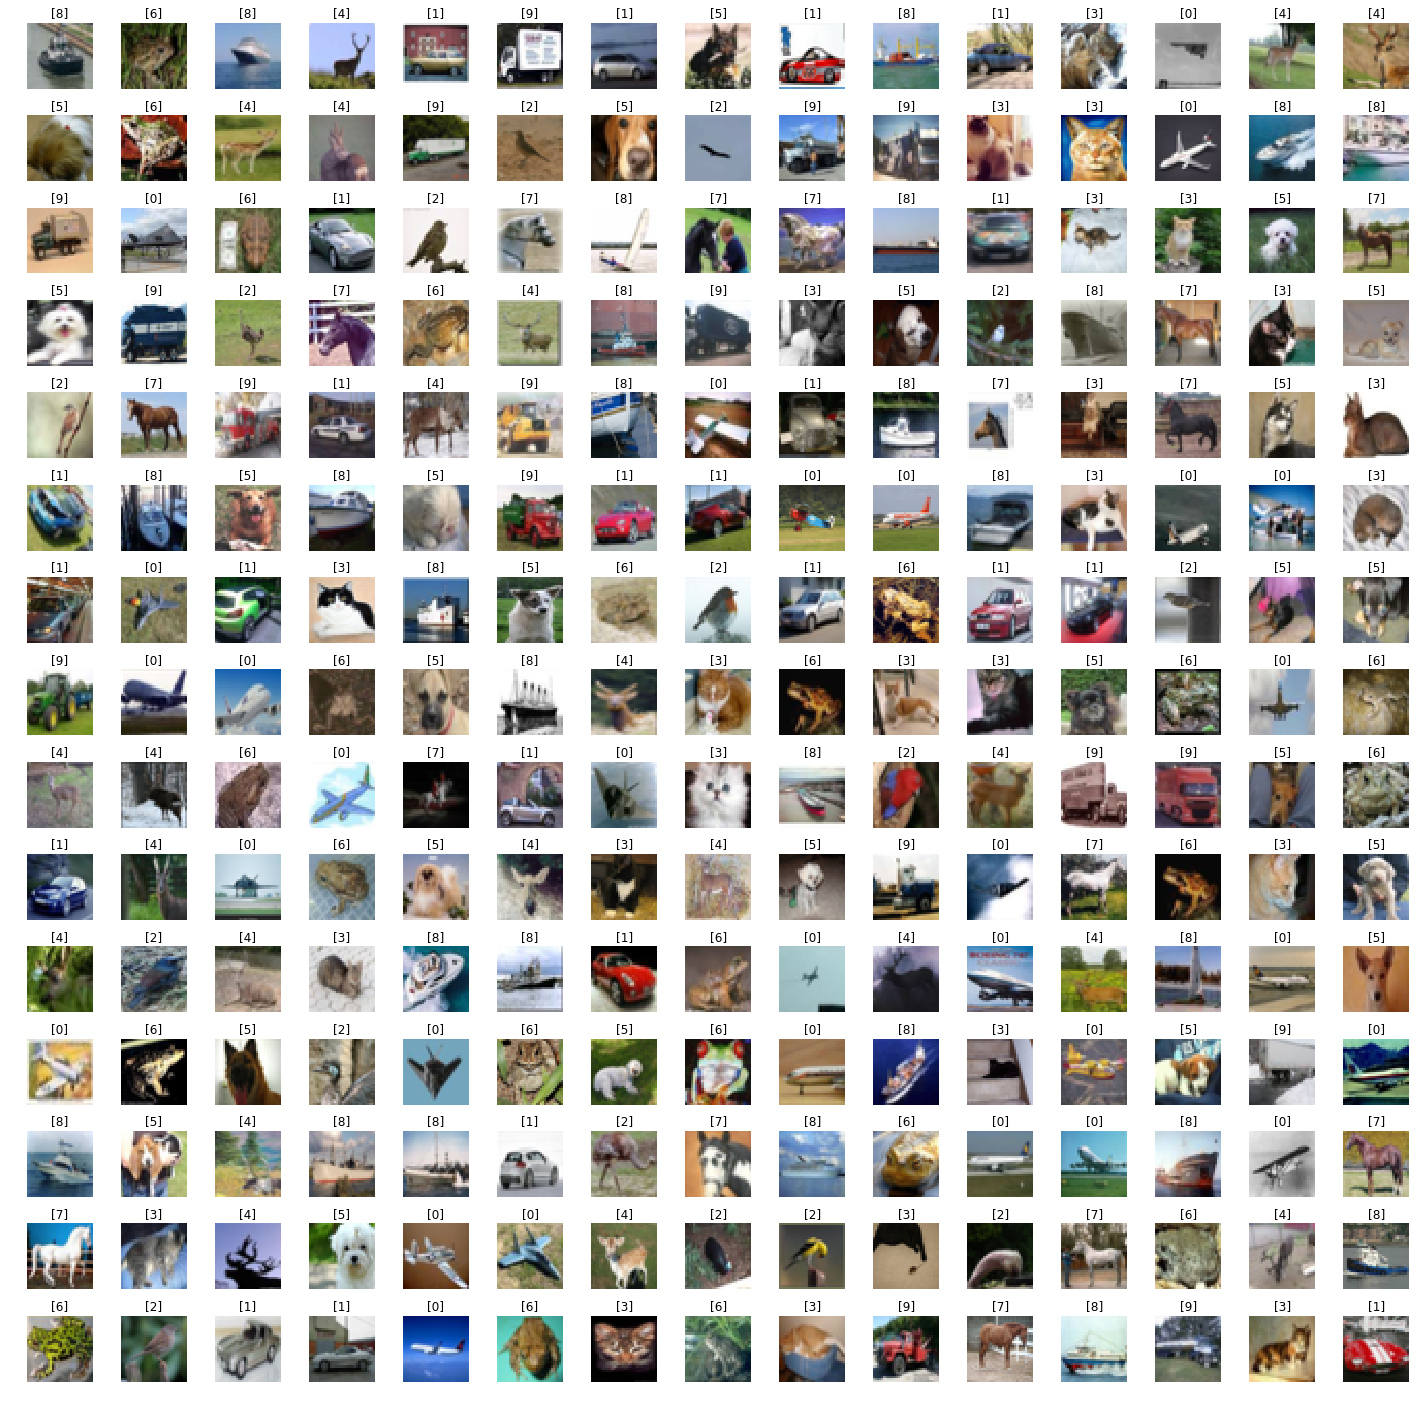

In [126]:
W_grid=15
L_grid=15

fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
# For flattening
axes=axes.ravel()
n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

## Data preparation

### Float conversion

In [127]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")


### Binary Encoding

In [128]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

## Normalizing the Data

In [129]:
X_train=X_train/255
X_test=X_test/255
print(X_train.shape)
input_shape=X_train.shape[1:]
input_shape


(50000, 32, 32, 3)


(32, 32, 3)

## Creating and Training the model

In [130]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D, Dense, Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [10]:
cnn_model=Sequential()

# First CNN Layer
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
# Second CNN Layer
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# MaxPooling 2D
cnn_model.add(MaxPooling2D(2,2))
# Dropout 30% of Neurons along with their weight
cnn_model.add(Dropout(0.3))

#Adding more depth with 64 filters
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
# Dropout 20% of Neurons along with their weight
cnn_model.add(Dropout(0.3))

## Flattening the data
cnn_model.add(Flatten())
## Adding Dense Layers
cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units=512,activation='relu'))
## Output Layer
cnn_model.add(Dense(units=10,activation='softmax'))

## Compiling the model

In [11]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr=0.001),metrics=['accuracy'])

## Fitting the training data with Shuffling

In [12]:
history=cnn_model.fit(X_train,y_train,batch_size=128,epochs=10,shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 273s 5ms/step - loss: 1.8270 - acc: 0.3377
Epoch 2/10
50000/50000 [==============================] - 271s 5ms/step - loss: 1.3717 - acc: 0.5109
Epoch 3/10
50000/50000 [==============================] - 271s 5ms/step - loss: 1.1602 - acc: 0.5916
Epoch 4/10
50000/50000 [==============================] - 271s 5ms/step - loss: 1.0032 - acc: 0.6485
Epoch 5/10
50000/50000 [==============================] - 274s 5ms/step - loss: 0.8847 - acc: 0.6915
Epoch 6/10
50000/50000 [==============================] - 272s 5ms/step - loss: 0.7983 - acc: 0.7208
Epoch 7/10
50000/50000 [==============================] - 272s 5ms/step - loss: 0.7255 - acc: 0.7450
Epoch 8/10
50000/50000 [==============================] - 273s 5ms/step - loss: 0.6628 - acc: 0.7673
Epoch 9/10
50000/50000 [==============================] - 271s 5ms/step - loss: 0.6122 - acc: 0.7853
Epoch 10/10
50000/50000 [==============================] - 272s 5ms/step - loss: 0.5668 - a

## Evaluate the Model

In [131]:
print("Test accuracy",cnn_model.evaluate(X_test,y_test)[1])

## predictions
predicted_classes=cnn_model.predict(X_test)


10000/10000 [==============================] - 20s 2ms/step
Test accuracy 0.7602


## Making Predicting and True Value Matrix

In [132]:
pred=[]
test=[]
for i in range(y_test.shape[0]):
    pred.append(np.argmax(predicted_classes[i]))
    test.append(np.argmax(y_test[i]))
predicted=np.array(pred)
true=np.array(test)
classes=np.unique(true)


## Plotting confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


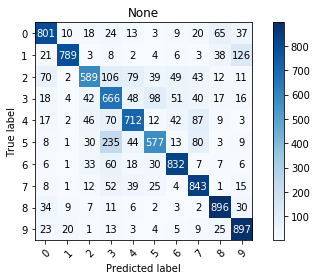

In [134]:
plot_confusion_matrix(true,pred,classes=classes)
plt.show()

## Saving the Model

In [135]:
import os
directory=os.path.join(os.getcwd(),"Saved Model")

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'Keras_CIFAR10_Trained_Model.h5')
cnn_model.save(model_path)

## Improving the model with data Augmentation

## Model Training using Augmented Dataset

In [140]:
datagen=ImageDataGenerator(
                            rotation_range=90,
                            width_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True
                            )

In [141]:
datagen.fit(X_train)

In [142]:
## Steps per epoch = 50000/128 , 50000 was image data size and 128 is the batch size

In [143]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=5,steps_per_epoch=50000/128)

Epoch 1/5
391/390 [==============================] - 282s 721ms/step - loss: 1.4701 - acc: 0.4760
Epoch 2/5
391/390 [==============================] - 284s 726ms/step - loss: 1.4063 - acc: 0.5049
Epoch 3/5
391/390 [==============================] - 283s 725ms/step - loss: 1.3672 - acc: 0.5180
Epoch 4/5
391/390 [==============================] - 283s 723ms/step - loss: 1.3437 - acc: 0.5256
Epoch 5/5
391/390 [==============================] - 283s 724ms/step - loss: 1.3190 - acc: 0.5352


## Saving Augmented Model

In [144]:
import os
directory=os.path.join(os.getcwd(),"Saved Model")

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'Keras_CIFAR10_Augmented_Model.h5')
cnn_model.save(model_path)